In [1]:
import matplotlib.pyplot as plt
import numpy as np

[0.09909666666666667, 0.08217, 0.12680333333333335, 0.079, 0.07950666666666667]


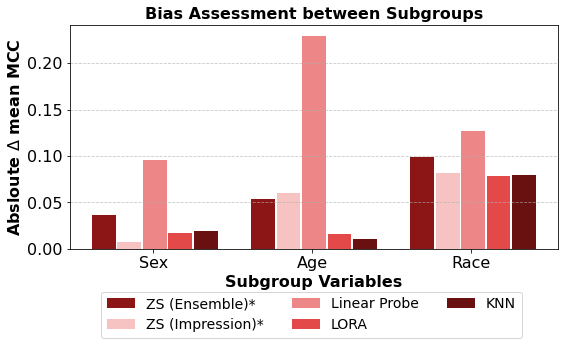

In [2]:
# Data setup
methods = ['ZS (Ensemble)*', 'ZS (Impression)*', 'Linear Probe', 'LORA', 'KNN']
bias_variables = ['Sex', 'Age', 'Race']


wa = [0.01019, 0.08267, 0.10236, 0.00334, 0.00967]
wb = [0.13845, 0.04058, 0.08784, 0.11850, 0.11926]
ab = [0.14865, 0.12326, 0.19021, 0.11516, 0.10959]
# compute mean of each entry over the three race variables
bias_mean = [sum(x) / 3 for x in zip(wa, wb, ab)]
print(bias_mean)

data = {
    'Sex': [0.03596, 0.00719, 0.09594, 0.01690, 0.01918],
    'Age': [0.05327, 0.05969, 0.22977, 0.01643, 0.01111],
    'Race': bias_mean
}

# Custom color palette
colors = ['#8C1515','#007C92', '#FEC51D', '#620059', '#E98300']
colors = ['#8C1515','#F6C2C2', '#ED8686', '#E44949', '#691010']


# Plotting
x = np.arange(len(bias_variables))  # the label locations
width = 0.15  # the width of the bars
gap = [-0.01, 0, 0.01, 0.02, 0.03]
fig, ax = plt.subplots(figsize=(8, 5))
for i, method in enumerate(methods):
    ax.bar(x + i * width+gap[i], [data[var][i] for var in bias_variables], width, label=method, color=colors[i])

# Adding labels, title, and legend
ax.set_xlabel('Subgroup Variables', fontsize=16, fontweight='bold')
ax.set_ylabel('Absloute $\Delta$ mean MCC', fontsize=16, fontweight='bold')
ax.set_title('Bias Assessment between Subgroups', fontsize=16, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(bias_variables, rotation=0,  fontsize=16)
ax.legend(title='Methods', fontsize=16, title_fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=14, loc='upper left', ncol=3, bbox_to_anchor=(0.05, -0.16))
# Adding grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Bias distribution

In [1]:
import pandas as pd
import os

import sys
current_dir = os.getcwd()
print(current_dir)
current_dir = "/mnt/data2/datasets_lfay/MedImageInsights/"
sys.path.append(current_dir)
from MedImageInsight.medimageinsightmodel import MedImageInsight
current_dir_pred = current_dir + "/predictions"
sys.path.append(current_dir_pred)
from utils import balance_dataset

/mnt/data2/datasets_lfay/MedImageInsights/Visualization


/mnt/data2/datasets_lfay/MedImageInsights/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### CheXpert
df_chexpert_train = pd.read_csv('/mnt/data2/datasets_lfay/MedImageInsights/data/CheXpert-v1.0-512/train.csv')
df_chexpert_test = pd.read_csv('/mnt/data2/datasets_lfay/MedImageInsights/data/CheXpert-v1.0-512/test.csv')
df_chexpert_val = pd.read_csv('/mnt/data2/datasets_lfay/MedImageInsights/data/CheXpert-v1.0-512/val.csv')

df_chexpert_train_no_finding = balance_dataset(df_chexpert_train, "Pneumonia", 1,False)
df_chexpert_test_no_finding = balance_dataset(df_chexpert_test, "Pneumonia", 1,False)
df_chexpert_val_no_finding = balance_dataset(df_chexpert_val, "Pneumonia", 1,False)

print('CheXpert No Finding vs Pneumonia')
print('Train:', len(df_chexpert_train_no_finding))
print('Test:', len(df_chexpert_test_no_finding))
print('Val:', len(df_chexpert_val_no_finding))

CheXpert No Finding vs Pneumonia
Train: 4178
Test: 2508
Val: 278


In [11]:
df_young = df_chexpert_test_no_finding[df_chexpert_test_no_finding['age'] < 62].age
df_old = df_chexpert_test_no_finding[df_chexpert_test_no_finding['age'] >= 62].age
print('Young:', len(df_young))
print('Old:', len(df_old))  

Young: 1122
Old: 1383


(array([ 99.,  54., 113.,  55.,  42.,  86.,  49.,  37.,  73.,  45.,  48.,
        101.,  39.,  51., 100.,  51.,  35.,  79.,  43., 183.]),
 array([62.  , 63.35, 64.7 , 66.05, 67.4 , 68.75, 70.1 , 71.45, 72.8 ,
        74.15, 75.5 , 76.85, 78.2 , 79.55, 80.9 , 82.25, 83.6 , 84.95,
        86.3 , 87.65, 89.  ]),
 <BarContainer object of 20 artists>)

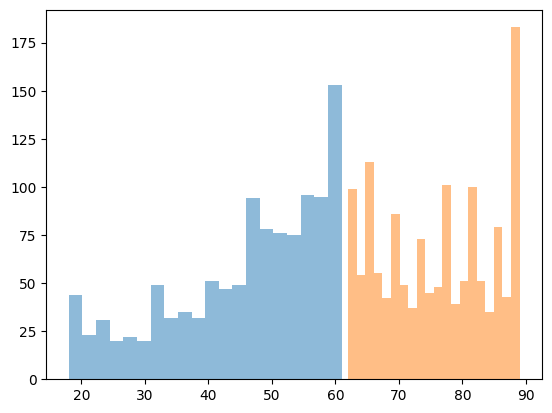

In [13]:
# Plot age distribution
import matplotlib.pyplot as plt
plt.hist(df_young, bins=20, alpha=0.5, label='Young')
plt.hist(df_old, bins=20, alpha=0.5, label='Old')


<Axes: xlabel='age', ylabel='Density'>

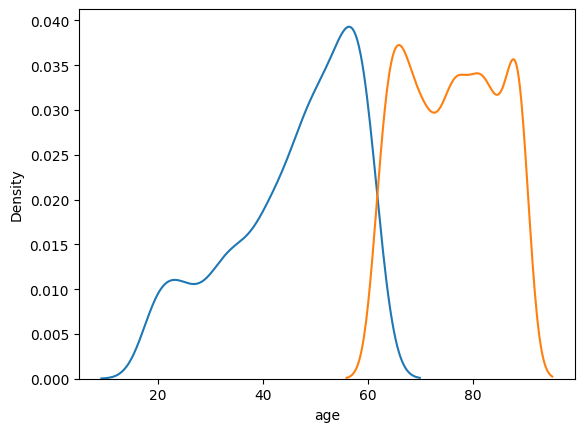

In [15]:
import seaborn as sns
sns.kdeplot(df_young, label='Young')
sns.kdeplot(df_old, label='Old')